# Modeling Credit Card Approval Data
Several credit card applications are received by banks and other financial institutions all year round. Whether a customer's application is approved or not depends on several factors like income, employment status, age, credit worthiness among others. It's almost impossible to analyze these applications manually. Machine Learning models provide an automated process of approving or rejecting credit card applications. 

In this project, I analyze the approval ratings of credit cards with respect to features including gender, age, debt, married, bank customer, industry, ethnicity, years employed, prior default, employed, credit score, driver's license, citizen, zipcode, income and approved (target feature). I also quantify credit risks rate within each category of some selected features.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

#### Data Description
First, we examine a few rows of the data along with its columns (features). 

In [4]:
data = pd.read_csv("clean_creditcard.csv", sep = ",")
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


We observe from the information about the dataset above that some of the features have datatype object. We need to convert these object (non-numeric) datatypes  to numeric values for the ML modeling.

In [6]:
newdata = data.drop('Approved', axis = 'columns')
Target = data['Approved']

newdata.describe()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,0.695652,31.514116,4.758725,0.760870,0.763768,2.223406,0.523188,0.427536,2.40000,0.457971,180.547826,1017.385507
std,0.460464,11.860245,4.978163,0.426862,0.425074,3.346513,0.499824,0.495080,4.86294,0.498592,173.970323,5210.102598
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,22.670000,1.000000,1.000000,1.000000,0.165000,0.000000,0.000000,0.00000,0.000000,60.000000,0.000000
50%,1.000000,28.460000,2.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,160.000000,5.000000
75%,1.000000,37.707500,7.207500,1.000000,1.000000,2.625000,1.000000,1.000000,3.00000,1.000000,272.000000,395.500000
max,1.000000,80.250000,28.000000,1.000000,1.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2000.000000,100000.000000


In [7]:
data.Approved.value_counts()

0    383
1    307
Name: Approved, dtype: int64

Therefore, from our dataset there is more denials (about 56%) than approvals (about 44%). This provides a benchmark for the ML modeling ahead.

In [8]:
data.groupby('Approved').mean()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,ZipCode,Income
Approved,,,,,,,,,,,,
0,0.707572,29.773029,3.839948,0.691906,0.691906,1.257924,0.201044,0.224543,0.631854,0.443864,196.049608,198.605744
1,0.680782,33.686221,5.904951,0.846906,0.853420,3.427899,0.925081,0.680782,4.605863,0.475570,161.208469,2038.859935


## Distribution of features of Credit Card Approvals Data
In this subsection, I examine various categorical and non-categorical features of the credit card approvals data using histogram and density plots.

#### Credit Card Approvals Based on Categorical Features
For the categorical features, I am considering gender, married, bank customer, industry, ethnicity, prior default, employed, drivers license, citizen.

<AxesSubplot:title={'center':'Distribution of Credit Card Approvals based on Gender'}, xlabel='Gender', ylabel='Number of Approvals'>

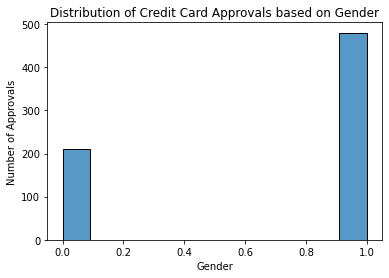

In [9]:
ax = plt.axes()
ax.set(xlabel='Gender', ylabel='Number of Approvals', title='Distribution of Credit Card Approvals based on Gender');
sns.histplot(data.Gender)

<AxesSubplot:title={'center':'Distribution of Credit Card Approvals based on Marriage Status'}, xlabel='Married', ylabel='Number of Approvals'>

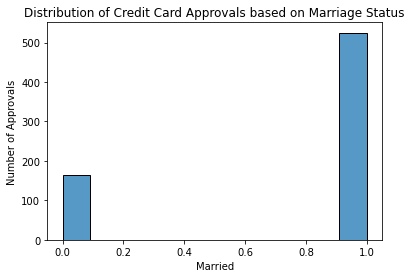

In [10]:
ax = plt.axes()
ax.set(xlabel='Married', ylabel='Number of Approvals', title='Distribution of Credit Card Approvals based on Marriage Status');
sns.histplot(data.Married)

#### Credit Card Approvals Based on Age

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Credit Card Approvals based on Age'}, xlabel='Age', ylabel='Rate of Approval'>

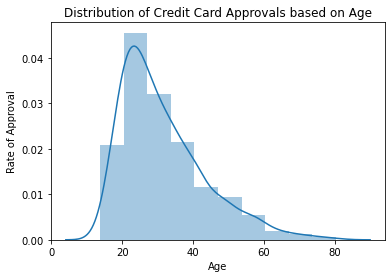

In [11]:
ax = plt.axes()
ax.set(xlabel='Age', ylabel='Rate of Approval', title='Distribution of Credit Card Approvals based on Age');
sns.distplot(data.Age, bins=10)

#### Credit Card Approvals Based on Debt

/Users/paa.willie/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Credit Card Approvals based on Debt'}, xlabel='Debt', ylabel='Rate of Approvals'>

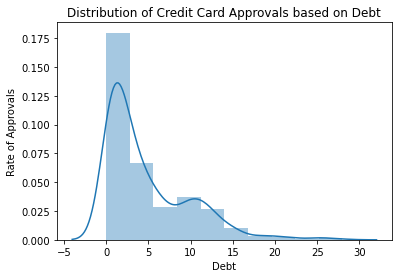

In [12]:
ax = plt.axes()
ax.set(xlabel='Debt', ylabel='Rate of Approvals', title='Distribution of Credit Card Approvals based on Debt');
sns.distplot(data.Debt, bins=10)

#### Data PreProcessing and Splitting
To carryout the machine learning models, I do some preprocessing and arbitrarily split the data into 75% training and 25% testing set. I use the 75% of the data to train the model and the remaining 25% to evaluate it.

First, we convert all the non-numeric data features into numeric values so that we can utilize the SciKit Learn ML library. SKLearn only uses numeric data. Label encoding in the SKLearn library will be used to do the conversion.

In [13]:
from sklearn.preprocessing import LabelEncoder
LabEnc = LabelEncoder()
for i in data:
    if data[i].dtypes == "object":
        LabEnc.fit(data[i])
        data[i] = LabEnc.transform(data[i])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    int64  
 6   Ethnicity       690 non-null    int64  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    int64  
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [15]:
data.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,4,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,1,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,4,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,4,1.71,1,0,0,0,1,120,0,1


In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Approved'], axis = 'columns'), data.Approved, test_size=0.25)
print(len(X_test))
print(len(X_train))

173
517


#### Rescaling Data
Now that we have successfully split our dataset into training and testing sets, let's rescale the observations of the various features to range between 0 and 1. 

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
rX_test = scaler.fit_transform(X_test)
rX_train = scaler.fit_transform(X_train)

In [18]:
print(len(rX_test))
print(len(rX_train))

173
517


#### Logistic Regression
From the dataset, we have several features (explanatory variables) and a response variable (Approval or Denial). This kind of data requires a supervised machine learning model like classification models. Logistic Regression is a classification model that helps to model relationship or correlations between the target variable and the explanatory variables. Logistic regression falls under generalized linear models.

In [19]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(rX_train, y_train)

LogisticRegression()

#### Model Prediction & Performance
We use the logistic regression model fit above to generate some predictions using the test data. Also, we compute the confusion matrix and accuracy to examine the performance of the model.

In [20]:
y_pred = lg.predict(rX_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
lgaccuracy = lg.score(rX_test, y_test)
print("Accuracy of logistic regression classifier = ", round(lgaccuracy, 2))

Accuracy of logistic regression classifier =  0.85


The logistic regression classifier is evaluated on the test data and its performance when making predictions on new data has an accuracy of about 85%. Now, let's examine the confusion matrix to observe the true negatives and true positives.

Text(15.0, 0.5, 'Actual')

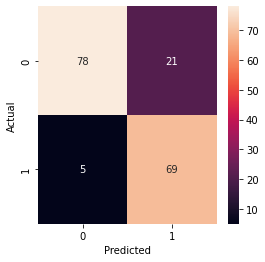

In [22]:
from sklearn.metrics import confusion_matrix
lgconfmat = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (4, 4))
sns.heatmap(lgconfmat, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
#print("Confusion matrix of logistic regression classifier =", lgconfmat)

In [23]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives = {TP}')
print(f'False Positives = {FP}')
print(f'True Negatives = {TN}')
print(f'False Negatives = {FN}')

True Positives = 69
False Positives = 21
True Negatives = 78
False Negatives = 5


From our initial model, we observe that out of 173 predictions made, we are wrong 26 times and correct 147 times which is approximately 85% given by the model accuracy. We now take it a step further to calculate the True Positive Ratio (a.k.a Sensitivity or Recall) and False Positive Ratio. These two (2) measures helps us to generate the Reciever Operating Characteristic curve or the ROC. The ROC graph provides a visualization plot of TRP vrs FPR at various classification probability thresholds ranging from 0 to 1.

In [73]:
probs = lg.predict_proba(X_test)[:, 1]
def conv_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [74]:
ROC_vals = []
for threshold in np.linspace(0, 1, 50):
    preds = conv_preds(threshold, probs)
    TN, FP, FN, TP = confusion_matrix(y_test, preds).ravel()
    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    ROC_vals.append([TPR, FPR])
TPR_vals, FPR_vals = zip(*ROC_vals)

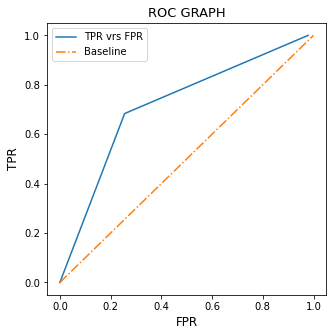

In [99]:
fig, ax = plt.subplots(figsize = (5, 5))
ax.plot(FPR_vals, TPR_vals, label = 'TPR vrs FPR')
ax.plot(np.linspace(0, 1, 50), np.linspace(0, 1, 50), label = 'Baseline', linestyle = '-.')
plt.title('ROC GRAPH', fontsize = 13)
plt.xlabel('FPR', fontsize = 12)
plt.ylabel('TPR', fontsize = 12)
plt.legend(fontsize = 10);

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, preds)

0.5

The yellow dashed diagonal line (where TPR = FPR) in the ROC graph represents AUC of 0.5. It should be noted that a model, like ours, that randomly guesses predictions has Area Under Curve (AUC) of 0.5 and if AUC of a model is greater than 0.5, the model is better than random guessing. Thus, the higher the better.